# <font color='green'>Homework 4</font>

<div class="alert alert-block alert-warning">
<b>
University of Tehran<br>
Fall 2022<br>
Course: Interactive Learning<br>
</div>


***

<div class="alert alert-block alert-success">
<b>Author:</b><br>
Name: Taban Soleymani <br />
Student Number: 
</div>

***

# <span style="color:purple">Importing Required Packages and Classes</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from abc import ABC, abstractmethod
import gym
import math
import random
import sys
# import pygame
from IPython import display
np.set_printoptions(threshold=sys.maxsize)

# <span style="color:purple">Defining Variables</span>

In [2]:
global student_num
global num_of_repetition
global num_of_episodes 
global epsilon
global learning_rate
global discount_factor
global window_size
student_num = xxx
num_of_repetition = 20
num_of_episodes = 2000
epsilon = 0.5
learning_rate = 0.1
discount_factor = 0.9
window_size = 50

## <span style="color:purple">Environment</span>

In [3]:
env = gym.make('Taxi-v3', render_mode='rgb_array')
# env.reset(seed=student_num)
# env.render()

## <span style="color:purple">Agent</span>

In [4]:
class Agent(ABC):
    def __init__(self, env=env, lr=learning_rate, df=discount_factor, eps=epsilon):
        super(Agent, self).__init__()
        self.env = env
        self.lr = lr
        self.lr_min = 1e-3
        self.eps = eps
        self.eps_min = 1e-3
        self.df = df
        self.q_values = np.zeros([self.env.observation_space.n, self.env.action_space.n])
        self.gt_of_all_episodes = []
        self.reward_of_all_episodes = []
        
        
    def get_epsilon_greedy_action(self, state):
        if np.random.random() < self.eps:
            return self.env.action_space.sample()
        return np.argmax(self.q_values[state])
        
    
    def reset(self):
        self.lr = learning_rate
        self.eps = epsilon
        self.q_values = np.zeros([self.env.observation_space.n, self.env.action_space.n])
        #self.gt_of_all_episodes = []
        
        
    def decay_lr(self, step):
        if step <= num_of_episodes:
            self.lr = (learning_rate - self.lr_min) * (max(0, (num_of_episodes - step)) / num_of_episodes) + self.lr_min
            
        
    def decay_eps(self, step):
        if step <= num_of_episodes:
            self.eps = (epsilon - self.eps_min) * (max(0, (num_of_episodes - step)) / num_of_episodes) + self.eps_min
   

    @abstractmethod
    def execute_episode(self):
        pass

# <span style="color:purple">Part 1</span>

In [5]:
class QLearning(Agent):
    def __init__(self):
        super(QLearning, self).__init__()
        
    
    def execute_episode(self):
        rewards_in_episode = []
        gts_in_episode = []
        
        state, _ = self.env.reset(seed=student_num)
        has_reached_to_terminal = False

        while not has_reached_to_terminal:
            action = self.get_epsilon_greedy_action(state)
            next_state, reward, has_reached_to_terminal, _, _ = self.env.step(action)
            rewards_in_episode.append(reward)
            gt = reward + self.df * np.max(self.q_values[next_state])
            gts_in_episode.append(gt)
            self.q_values[state, action] = self.q_values[state, action] + self.lr * (gt - self.q_values[state, action])
            state = next_state
            
        return sum(rewards_in_episode), sum(gts_in_episode)
    
    
    def q_learning(self, decaying_lr):

        for repetition in range(num_of_repetition):
            self.reset()
            gt_per_rep = []
            reward_per_rep = []
            for episode in range(num_of_episodes):
                reward_per_episode, gt_per_episode = self.execute_episode()
                gt_per_rep.append(gt_per_episode)
                reward_per_rep.append(reward_per_episode)
                self.decay_eps(episode + 1)
                if decaying_lr:
                    self.decay_lr(episode + 1)
            self.gt_of_all_episodes.append(gt_per_rep)
            self.reward_of_all_episodes.append(reward_per_rep)

In [6]:
q_learning_agent = QLearning()
q_learning_agent.q_learning(False)
q_learning_agent_with_decaying = QLearning()
q_learning_agent_with_decaying.q_learning(True)

In [7]:
print(q_learning_agent.q_values)
print(q_learning_agent.gt_of_all_episodes[-1][-1])
print(q_learning_agent.reward_of_all_episodes[-1][-1])

[[  0.           0.           0.           0.           0.
    0.        ]
 [ -0.55207981  -0.66940527  -0.48201562  -0.56862155  -0.75786847
   -4.22508865]
 [  0.           0.           0.           0.           0.
    0.        ]
 [  0.           0.           0.           0.           0.
    0.        ]
 [  0.           0.           0.           0.           0.
    0.        ]
 [  0.           0.           0.           0.           0.
    0.        ]
 [  0.           0.           0.           0.           0.
    0.        ]
 [  0.           0.           0.           0.           0.
    0.        ]
 [  0.           0.           0.           0.           0.
    0.        ]
 [ -0.1         -0.1         -0.1          0.           0.
    0.        ]
 [  0.           0.           0.           0.           0.
    0.        ]
 [  0.           0.           0.           0.           0.
    0.        ]
 [  0.           0.           0.           0.           0.
    0.        ]
 [ -4.09597182  -

In [8]:
print(q_learning_agent_with_decaying.q_values)
print(q_learning_agent_with_decaying.gt_of_all_episodes[-1][-1])
print(q_learning_agent_with_decaying.reward_of_all_episodes[-1][-1])

[[  0.           0.           0.           0.           0.
    0.        ]
 [ -0.64330547  -0.65851327  -0.66208015  -0.75434949  -0.66899864
   -4.77127377]
 [  0.           0.           0.           0.           0.
    0.        ]
 [  0.           0.           0.           0.           0.
    0.        ]
 [  0.           0.           0.           0.           0.
    0.        ]
 [  0.           0.           0.           0.           0.
    0.        ]
 [  0.           0.           0.           0.           0.
    0.        ]
 [  0.           0.           0.           0.           0.
    0.        ]
 [  0.           0.           0.           0.           0.
    0.        ]
 [ -0.4164397   -0.48665897  -0.45122546  -0.45122546  -4.75235087
   -3.51610623]
 [  0.           0.           0.           0.           0.
    0.        ]
 [  0.           0.           0.           0.           0.
    0.        ]
 [  0.           0.           0.           0.           0.
    0.        ]
 [ -4.255

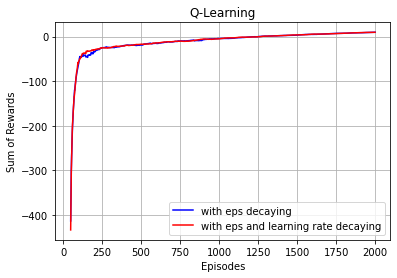

In [9]:
df_qLearning = pd.DataFrame(data=np.mean(q_learning_agent.reward_of_all_episodes, axis=0), index=range(num_of_episodes))
df_qLearningDecaying = pd.DataFrame(data=np.mean(q_learning_agent_with_decaying.reward_of_all_episodes, axis=0), index=range(num_of_episodes))

qLearning_moving = df_qLearning.rolling(window=window_size).mean()
qLearningDecaying_moving = df_qLearningDecaying.rolling(window=window_size).mean()

plt.title('Q-Learning')
plt.plot(qLearning_moving, 'b', label='with eps decaying')
plt.plot(qLearningDecaying_moving, 'r', label='with eps and learning rate decaying')
plt.ylabel('Sum of Rewards')
plt.xlabel('Episodes')
plt.legend()
plt.grid()
plt.show()

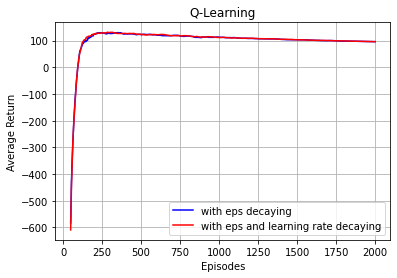

In [10]:
df_qLearning = pd.DataFrame(data=np.mean(q_learning_agent.gt_of_all_episodes, axis=0), index=range(num_of_episodes))
df_qLearningDecaying = pd.DataFrame(data=np.mean(q_learning_agent_with_decaying.gt_of_all_episodes, axis=0), index=range(num_of_episodes))

qLearning_moving = df_qLearning.rolling(window=window_size).mean()
qLearningDecaying_moving = df_qLearningDecaying.rolling(window=window_size).mean()

plt.title('Q-Learning')
plt.plot(qLearning_moving, 'b', label='with eps decaying')
plt.plot(qLearningDecaying_moving, 'r', label='with eps and learning rate decaying')
plt.ylabel('Average Return')
plt.xlabel('Episodes')
plt.legend()
plt.grid()
plt.show()

In [12]:
np.savetxt('q1.out', q_learning_agent.q_values.reshape(1,6*500), delimiter=',')
np.savetxt('q2.out', q_learning_agent_with_decaying.q_values.reshape(1,6*500), delimiter=',')